In [136]:
!pip install tensorflow

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow.keras as tf
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [257]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [258]:
# Step 1: Data Exploration: Understanding the dataset and key features.
print(data.info())
print()
print(data.describe())
print()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [259]:
data.shape

(7043, 21)

In [260]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<bound method DataFrame.count of   Churn  count
0    No   5174
1   Yes   1869>


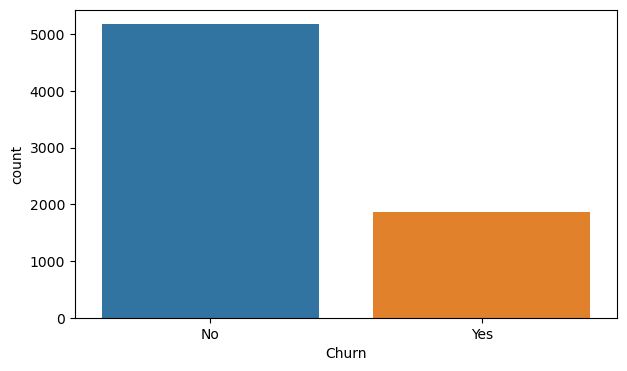

In [261]:
# use bar chart to show result of how many yes(1) and no(0)
churn_counts = data["Churn"].value_counts().reset_index()
churn_counts.columns = ["Churn", "count"]
print(churn_counts.count)

plt.figure(figsize=(7, 4))
sns.barplot(x="Churn", y="count", data=churn_counts, estimator=sum, hue="Churn")
plt.show()

In [262]:
# drop ID
data = data.drop(["customerID"],axis=1)
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


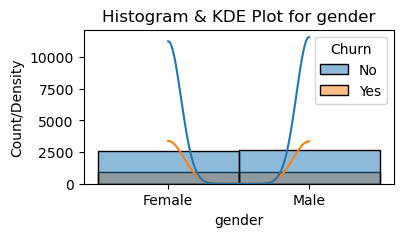

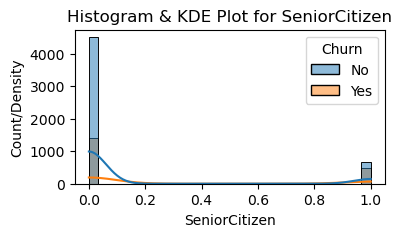

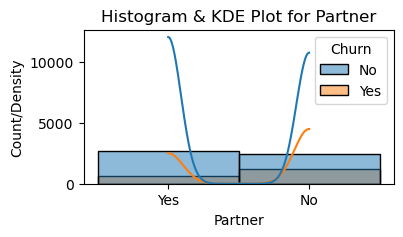

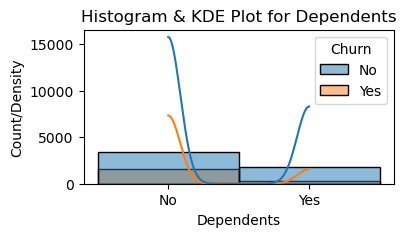

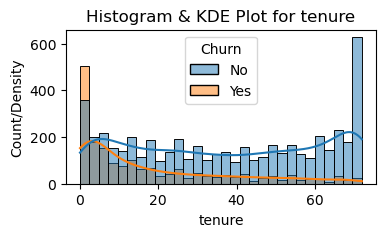

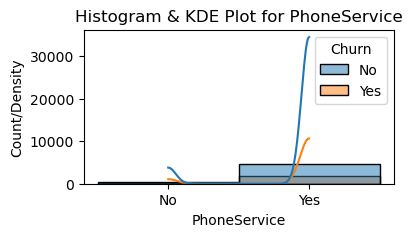

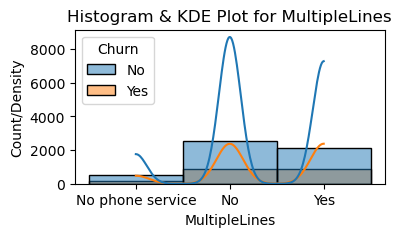

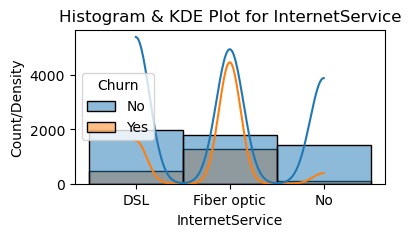

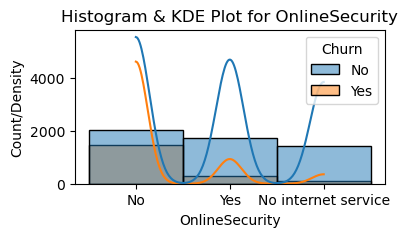

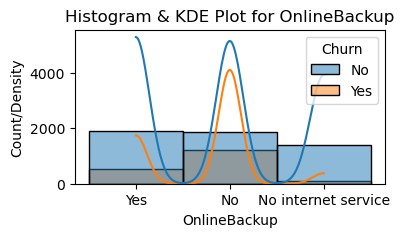

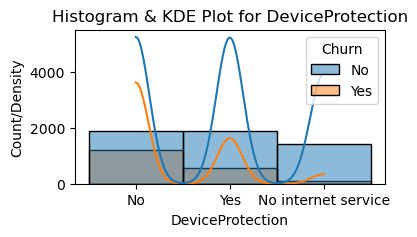

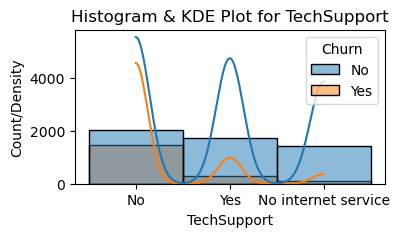

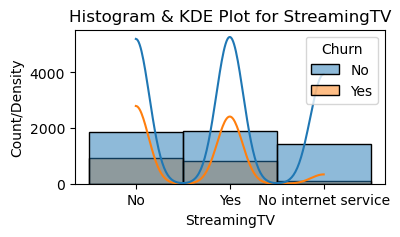

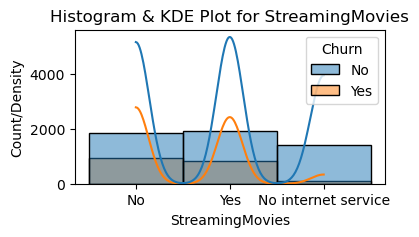

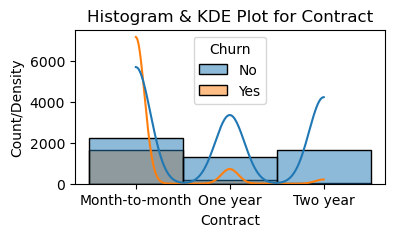

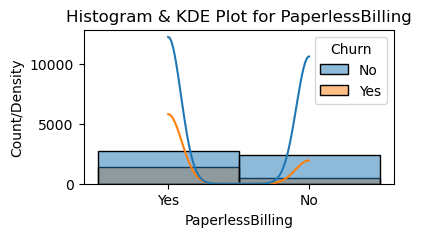

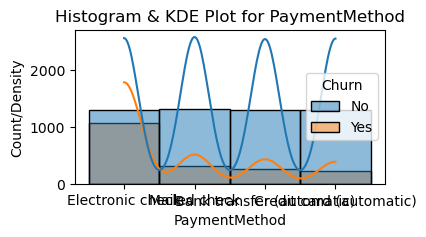

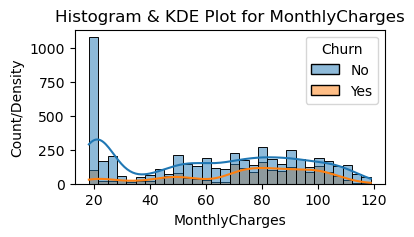

C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


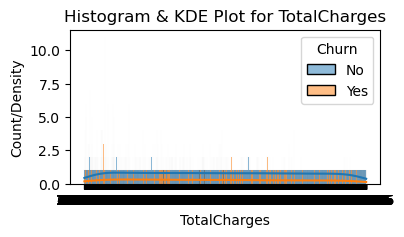

In [263]:
# it's better to draw chart during data exploration, so we use histplot to show relationships between each feature and outcome
feature_columns = data.drop(columns=["Churn"]).columns
for feature in feature_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=data, x=data[feature], hue=data["Churn"], bins=30, kde=True)
    plt.title(f"Histogram & KDE Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count/Density")
    plt.show()

In [264]:
# Step 2: Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
# clean data by dropping null
data = data.dropna()
total_rows = len(data)
print(f"total rows after cleaning data: {total_rows}")

total rows after cleaning data: 7043


In [265]:
# convert categorical data into numerical values for 17 columns (21 columns - 1 dropped column - 3 numberical data columns)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'])
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'])
data['TechSupport'] = le.fit_transform(data['TechSupport'])
data['StreamingTV'] = le.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'])
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = le.fit_transform(data['TotalCharges'])
data['Churn'] = le.fit_transform(data['Churn'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [266]:
print(data.shape)
data.describe()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [267]:
# Correlation matrix
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


In [268]:
# Display correlation with Churn column
print(data.corr()["Churn"].sort_values(ascending=False))

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


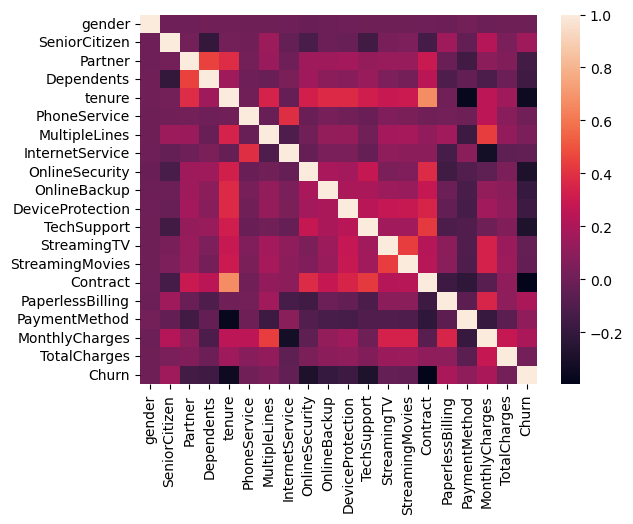

In [269]:
sns.heatmap(data.corr())
plt.show()

In [270]:
# drop unimportant features such as gender, Phoneservice, TotalCharges, MultipleLines, StreamingTV, StreamingMovies, InternetService
data = data.drop(["gender", "PhoneService", "TotalCharges", "MultipleLines", "StreamingTV", "StreamingMovies", "InternetService"],axis=1)
print(data.shape)
data.head()

(7043, 13)


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,1


In [271]:
# Step 3: Modeling: Implementing and evaluating machine learning model.
y = data['Churn']
x = data.drop(['Churn'],axis=1)

In [272]:
# scaling and nommalization excluding the last column "Churn"
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [273]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.20511329,
         1.33486261, -0.25962894],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

In [274]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,6.809830e-17,2.295165e-17,-4.539887e-17,-3.127478e-17,-7.566478e-17,-5.952296e-17,-1.160193e-17,-6.406285e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-8.282069e-01,-1.205113e+00,-1.474052e+00,-1.545860e+00
25%,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-8.282069e-01,-1.205113e+00,-5.377472e-01,-9.725399e-01
50%,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,2.442417e-01,1.063153e-01,1.086002e-01,2.355183e-01,-8.282069e-01,8.297975e-01,3.985577e-01,1.857327e-01
75%,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,3.712710e-01,8.297975e-01,3.985577e-01,8.338335e-01
max,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.570749e+00,8.297975e-01,1.334863e+00,1.794352e+00


In [275]:
# Split data into training and testing
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)

In [277]:
y_train.value_counts()

Churn
0    4153
1    1481
Name: count, dtype: int64

In [278]:
x.shape

(7043, 12)

In [279]:
# Compute class weights to adjust data imbalance issue since there are 5174 No and 1869 Yes in Churn column
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# the weight 1.902 increases its importance in the model for Yes Churn since it's minority.
print(class_weight_dict)

{0: 0.6783048398747893, 1: 1.902093180283592}


In [280]:
# Create neural network model
model = tf.models.Sequential()
### add the layers
model.add(tf.layers.Dense(64, input_dim=12, activation='relu')),
model.add(tf.layers.Dropout(0.3)),
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(1,activation="sigmoid"))
## compile the model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=50, class_weight=class_weight_dict, verbose=1, validation_split=0.2)

Epoch 1/50


C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6241 - loss: 0.6046 - val_accuracy: 0.7320 - val_loss: 0.5380
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7080 - loss: 0.5373 - val_accuracy: 0.7445 - val_loss: 0.5165
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7286 - loss: 0.5078 - val_accuracy: 0.7400 - val_loss: 0.5199
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7181 - loss: 0.5134 - val_accuracy: 0.7480 - val_loss: 0.4997
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7178 - loss: 0.5119 - val_accuracy: 0.7462 - val_loss: 0.4887
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7435 - loss: 0.4815 - val_accuracy: 0.7365 - val_loss: 0.4962
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7441 - loss: 0.4928 - val_accuracy: 0.7533 - val_loss: 0.4744
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7375 - loss: 0.4895 - val_accuracy: 0.7240 - val

In [368]:
# predict and convert the probability output to binary value 0 or 1.
y_pred = model.predict(x_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [369]:
# Step 4: Evaluation: Evaluate the performance of the model.
accuracy = accuracy_score(y_test,y_pred_binary)
print("accuracy:", accuracy)

accuracy: 0.7388218594748048


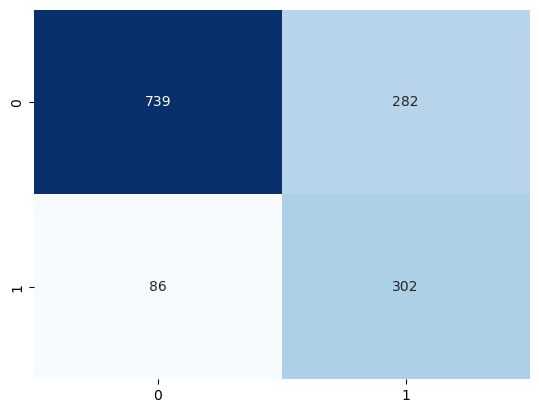

In [370]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [371]:
# print the precision, recall, F1-score
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1021
           1       0.52      0.78      0.62       388

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



In [372]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred_binary)}")

F1 Score : 0.6213991769547325


In [373]:
# print roc_auc_score
roc_auc_score(y_test, y_pred_binary)

0.7510753556751516

In [374]:
# print first 10 prediction values
print(y_pred_binary[:10])

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]


In [375]:
# Sigmoid outputs probabilities. I'm printing some the of Yes Churn. AS we can see, it's greater than threshold 0.5.
countYes = 0
for value in y_pred:
    if value > 0.5:
        print(value, end=", ")
        countYes = countYes + 1
print("\n\nPredicted Yes Churn:" + str(countYes))
print("Predicted No Churn:" + str(len(y_pred) - countYes))

[0.616295], [0.90143704], [0.56065965], [0.6981398], [0.51612854], [0.6770761], [0.6846416], [0.663623], [0.8327675], [0.73992383], [0.8156295], [0.82496744], [0.8718293], [0.5622152], [0.8948931], [0.5774923], [0.57986796], [0.8266035], [0.6080457], [0.8662341], [0.83859324], [0.70471644], [0.7307706], [0.89341265], [0.9003247], [0.52292395], [0.87539345], [0.85719836], [0.8180417], [0.90672725], [0.8841529], [0.8731043], [0.7548828], [0.88053757], [0.7326765], [0.60953647], [0.8912424], [0.8779393], [0.84103346], [0.8238691], [0.8420023], [0.857714], [0.621934], [0.8253747], [0.8911387], [0.59488523], [0.78772306], [0.7729757], [0.5313356], [0.6864693], [0.83260864], [0.5559382], [0.8956559], [0.880862], [0.83726096], [0.75405], [0.9229702], [0.50161254], [0.6845176], [0.7080307], [0.8018222], [0.8335024], [0.8657114], [0.57850456], [0.7535656], [0.68845594], [0.62248427], [0.774505], [0.5746025], [0.647436], [0.6502278], [0.8816766], [0.8502534], [0.8146827], [0.71955186], [0.912449

In [ ]:
# I did fine tuning by trimming features, using compute class weight to balance data for Yes and No Churn,
# and check F1 score to ensure it's a good model.